#  The Sparks Foundation
#### Data Science and Business Analytics (GRIP JULY'22)

##  Task 2: Prediction using Unsupervised ML

### Problem Statement

* From the given 'Iris' dataset, print the optimum number of clusters and represent it visually.

#### Author: Mukul Mahawar

*****

#### Importing all libraries required in this notebook

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

####  Dataset needed  : https://bit.ly/3kXTdox

Reading dataset 

In [2]:
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### Data Understanding

In [3]:
df.shape

(150, 6)

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
df.isnull()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [9]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

No null values are  present in the 'Iris' dataset.

In [11]:
print('Number of duplicate rows: ' , df.duplicated().sum())          # check for duplicates

Number of duplicate rows:  0


### Convert categorical feature into numerical using label encoding

In [12]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [13]:
LabelEncoder = preprocessing.LabelEncoder()
df['Species'] = LabelEncoder.fit_transform(df['Species'])
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


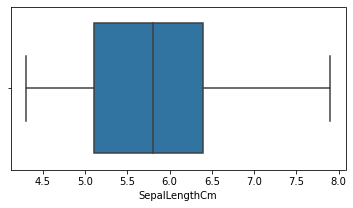

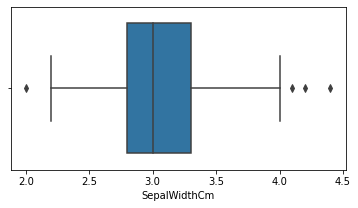

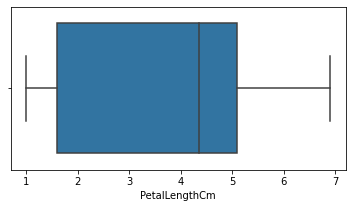

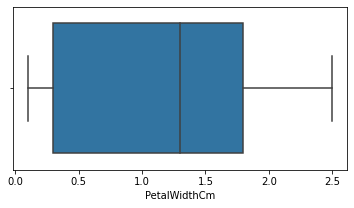

In [14]:
for i in df.columns:                                ## Check for any outliers in the numeric data
    if df[i].dtype=='float64':
        plt.figure(figsize=(6,3))
        sns.boxplot(df[i])
        plt.show()

In [15]:
q1,q3 = np.percentile(df['SepalWidthCm'],[25,75])                  ## Treating outliers present in the SepalWidthCm column
iqr = q3-q1
lower_fence = q1 - (1.5*iqr)
upper_fence = q3 + (1.5*iqr)
df['SepalWidthCm'] = df['SepalWidthCm'].apply(lambda x: upper_fence if x>upper_fence 
                                                  else lower_fence if x<lower_fence else x)
        


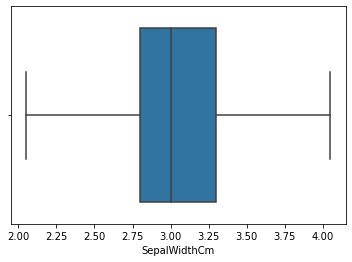

In [16]:
sns.boxplot(df['SepalWidthCm']);

### Normalizing data

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

scaled_df

array([[-1.72054204e+00, -9.00681170e-01,  1.06572221e+00,
        -1.34127240e+00, -1.31297673e+00, -1.22474487e+00],
       [-1.69744751e+00, -1.14301691e+00, -1.20170457e-01,
        -1.34127240e+00, -1.31297673e+00, -1.22474487e+00],
       [-1.67435299e+00, -1.38535265e+00,  3.54186609e-01,
        -1.39813811e+00, -1.31297673e+00, -1.22474487e+00],
       [-1.65125846e+00, -1.50652052e+00,  1.17008076e-01,
        -1.28440670e+00, -1.31297673e+00, -1.22474487e+00],
       [-1.62816394e+00, -1.02184904e+00,  1.30290074e+00,
        -1.34127240e+00, -1.31297673e+00, -1.22474487e+00],
       [-1.60506942e+00, -5.37177559e-01,  2.01443634e+00,
        -1.17067529e+00, -1.05003079e+00, -1.22474487e+00],
       [-1.58197489e+00, -1.50652052e+00,  8.28543675e-01,
        -1.34127240e+00, -1.18150376e+00, -1.22474487e+00],
       [-1.55888037e+00, -1.02184904e+00,  8.28543675e-01,
        -1.28440670e+00, -1.31297673e+00, -1.22474487e+00],
       [-1.53578584e+00, -1.74885626e+00, -3.573

In [18]:
df.Species.unique()

array([0, 1, 2])

### Model building

In [19]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'single')     # create clusters

In [20]:
y_hc = hc.fit_predict(scaled_df)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters

,Clusters
0,2
1,2
2,2
3,2
4,2
...,...
145,0
146,0
147,0
148,0


### K-Means Clustering

In [21]:
from sklearn.cluster import KMeans

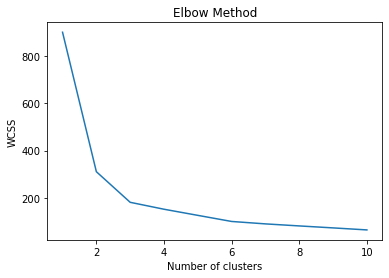

In [22]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

In [23]:
wcss

[900.0,
 310.8682121687612,
 181.54344154319438,
 152.29138661927385,
 126.41849135263675,
 100.64231252926913,
 90.38564639861254,
 81.77573982042212,
 73.44750417804634,
 64.9191379322433]

In [24]:
clusters_new = KMeans(3, max_iter=500, algorithm='auto', random_state=42)       #Build Cluster algorithm
clusters_new.fit(scaled_df)

KMeans(max_iter=500, n_clusters=3, random_state=42)

In [25]:
clusters_new.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [26]:
df['clusterid_new'] = clusters_new.labels_                                    #Assign clusters to the data set

In [27]:
clusters_new.cluster_centers_

array([[ 1.16627346,  0.95975051, -0.12017046,  1.03879425,  1.11105616,
         1.22474487],
       [-1.1547262 , -1.01457897,  0.84514617, -1.30487835, -1.25512862,
        -1.22474487],
       [ 0.03375354,  0.08963316, -0.70171397,  0.29580373,  0.18126414,
         0.04710557]])

In [28]:
df.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
,,mean,mean,mean,mean,mean,mean
0,0,126.000000,6.635417,3.000000,5.585417,2.043750,2.000000
1,1,25.500000,5.006000,3.407000,1.464000,0.244000,0.000000
2,2,76.961538,5.917308,2.754808,4.278846,1.336538,1.038462


In [29]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,clusterid_new
0,1,5.1,3.5,1.4,0.2,0,1
1,2,4.9,3.0,1.4,0.2,0,1
2,3,4.7,3.2,1.3,0.2,0,1
3,4,4.6,3.1,1.5,0.2,0,1
4,5,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2,0
146,147,6.3,2.5,5.0,1.9,2,0
147,148,6.5,3.0,5.2,2.0,2,0
148,149,6.2,3.4,5.4,2.3,2,0


In [30]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',                           # Creating the kmeans classifier
                max_iter = 300, n_init = 10, random_state = 42)
y_kmeans = kmeans.fit_predict(scaled_df)

In [31]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

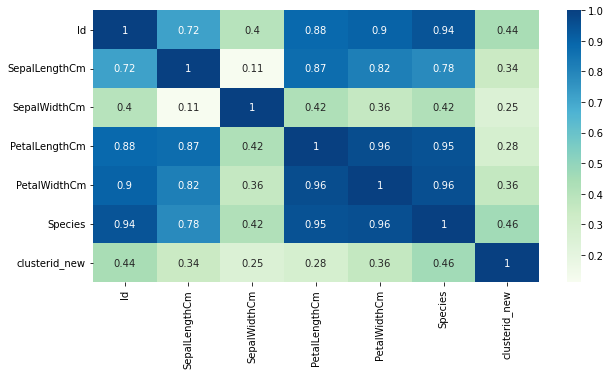

In [32]:
plt.figure(figsize=(10,5))
sns.heatmap(abs(df.corr()), cmap='GnBu', annot=True);

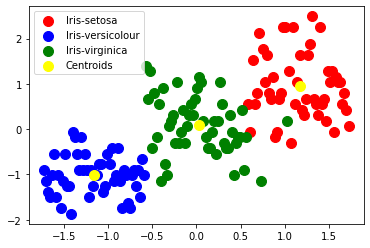

In [33]:
plt.scatter(scaled_df[y_kmeans == 0, 0], scaled_df[y_kmeans == 0, 1],          # Visualising the clusters - On the first two columns
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(scaled_df[y_kmeans == 1, 0], scaled_df[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(scaled_df[y_kmeans == 2, 0], scaled_df[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],       # Plotting the centroids of the clusters
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

****